***Phase 1/4***

**Data Cleaning, Analysis and Visualization**

**Phase Objective**

The objective of this phase is to prepare the dataset for modeling by cleaning and transforming it and to identify key features that will be relevant in predicting ride-request demands.

Instructions

1. Learn how to clean and transform data using pandas library in Python.

2. Understand how to use visualization techniques in matplotlib and seaborn libraries to explore and interpret data.

3. Practice identifying and handling missing values, outliers, and anomalies in real-world datasets

4. Apply encoding techniques to convert categorical data into numerical data.

***1. Import Libraries & Load Data***

In [1]:
#Importing the necessariry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv(r"Data\Bengaluru Ola.csv")

# Preview first rows and some statistics
print('First Rows:')
print(df.head())


First Rows:
         Date      Time  Booking ID       Booking Status  Customer ID  \
0  28/01/2024   6:00:00  CNR1721175              Success       329258   
1  26/01/2024   3:00:00  CNR2871422  Cancelled by Driver       201414   
2  15/01/2024  16:00:00  CNR6875935  Cancelled by Driver       301629   
3  02/01/2024  22:00:00  CNR6798834  Cancelled by Driver       319684   
4  30/01/2024  22:00:00  CNR9661713           Incomplete       330283   

  Vehicle Type Pickup Location Drop Location  Avg VTAT  Avg CTAT  ...  \
0         Auto          Area-3        Area-2      5.42     18.46  ...   
1         Mini          Area-7        Area-6       NaN       NaN  ...   
2         Bike         Area-40       Area-24       NaN       NaN  ...   
3  Prime Sedan         Area-11       Area-24       NaN       NaN  ...   
4         Bike         Area-41       Area-45       NaN       NaN  ...   

   Reason for Cancelling by Customer Cancelled Rides by Driver  \
0                                NaN        

In [3]:
print('Statistics:')
print(df.describe())

Statistics:
         Customer ID      Avg VTAT      Avg CTAT  Cancelled  by Customer  \
count   49999.000000  33484.000000  33484.000000            49999.000000   
mean   550979.937539     10.481654     15.564320                0.075982   
std    258855.930945      5.490853      8.365313                0.264971   
min    100001.000000      1.000000      1.000000                0.000000   
25%    328740.500000      5.730000      8.310000                0.000000   
50%    552598.000000     10.460000     15.610000                0.000000   
75%    773970.000000     15.240000     22.790000                0.000000   
max    999991.000000     20.000000     30.000000                1.000000   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count               49999.000000      49999.000000   33484.000000   
mean                    0.192204          0.062121    1023.374286   
std                     0.394036          0.241378     563.595072   
min                     0.0

***2. Keep Only Bike/eBike Rides***

In [4]:
# Filter dataset to only include Bike or eBike
df = df[df['Vehicle Type'].isin(['Bike', 'eBike'])]

print("Remaining rows after filtering:", df.shape[0])
df['Vehicle Type'].value_counts()


Remaining rows after filtering: 14320


Vehicle Type
Bike     7223
eBike    7097
Name: count, dtype: int64

***3. Inspect & Handle Missing Values***

In [5]:
# Check missing values
df.isnull().sum()


Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                              4711
Avg CTAT                              4711
Cancelled  by Customer                   0
Reason for Cancelling by Customer    13220
Cancelled Rides by Driver                0
Reason for Cancelling by Driver      11582
Incomplete Rides                         0
Incomplete Rides Reason              13447
Booking Value                         4711
Payment Method                        4711
Ride Distance                         4711
Driver Ratings                        4711
Customer Rating                       4711
dtype: int64

In [6]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


In [7]:
df.isnull().sum()

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled  by Customer               0
Reason for Cancelling by Customer    0
Cancelled Rides by Driver            0
Reason for Cancelling by Driver      0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Payment Method                       0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
dtype: int64

***4. Handle Outliers (Example: Ride Distance)***

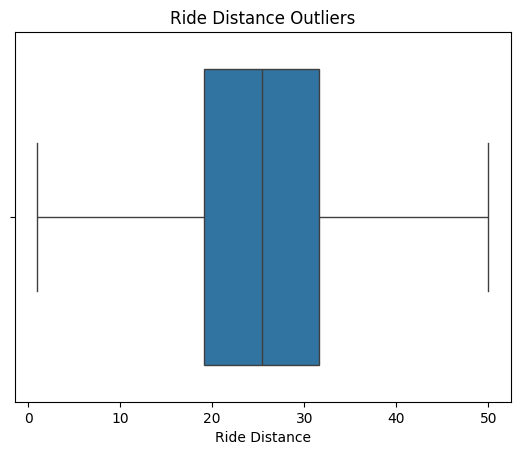

In [8]:
# Visualize ride distance distribution
sns.boxplot(x=df['Ride Distance'])
plt.title("Ride Distance Outliers")
plt.show()

In [9]:
# Remove extreme outliers using IQR method
Q1 = df['Ride Distance'].quantile(0.25)
Q3 = df['Ride Distance'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Ride Distance'] >= Q1 - 1.5*IQR) & (df['Ride Distance'] <= Q3 + 1.5*IQR)]

***5. Encode Categorical Variables***

In [10]:
# Encode 'Vehicle Type' as numeric
df['Vehicle Type'] = df['Vehicle Type'].astype('category').cat.codes

# One-hot encode key categorical variables
df = pd.get_dummies(df, columns=['Payment Method', 'Booking Status'], drop_first=True)


***6. Feature Engineering (Add Hour Column)***

In [11]:
# Convert 'Time' into datetime hour
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

df[['Time', 'Hour']].head()


,Time,Hour
2,16:00:00,16
4,22:00:00,22
7,0:00:00,0
12,14:00:00,14
13,21:00:00,21


***7. Exploratory Data Analysis (EDA)***

*Ride Requests by Hour*

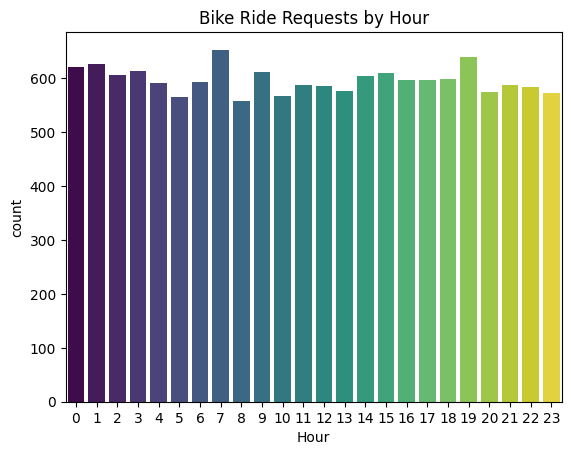

In [12]:
sns.countplot(x='Hour', hue= 'Hour', data=df, palette="viridis", legend=False)
plt.title("Bike Ride Requests by Hour")
plt.show()


*Top Pickup Locations*

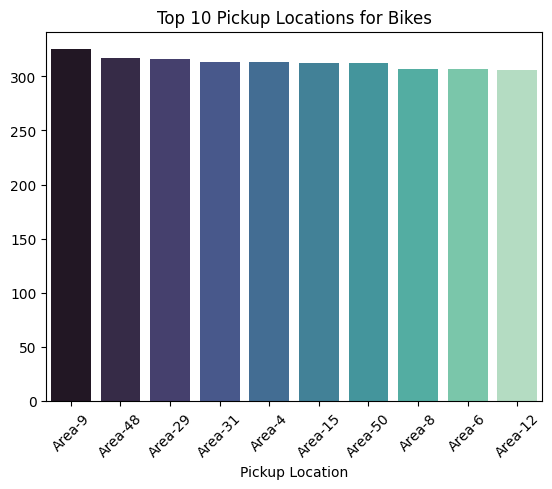

In [13]:
top_pickups = df['Pickup Location'].value_counts().head(10)
sns.barplot(x=top_pickups.index, y=top_pickups.values, hue=top_pickups.index, palette="mako", legend=False )
plt.title("Top 10 Pickup Locations for Bikes")
plt.xticks(rotation=45)
plt.show()

*Booking Status Distribution*

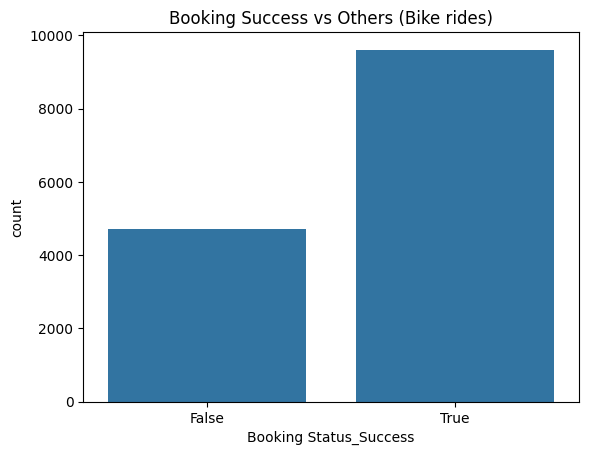

In [14]:
sns.countplot(x='Booking Status_Success', data=df)
plt.title("Booking Success vs Others (Bike rides)")
plt.show()

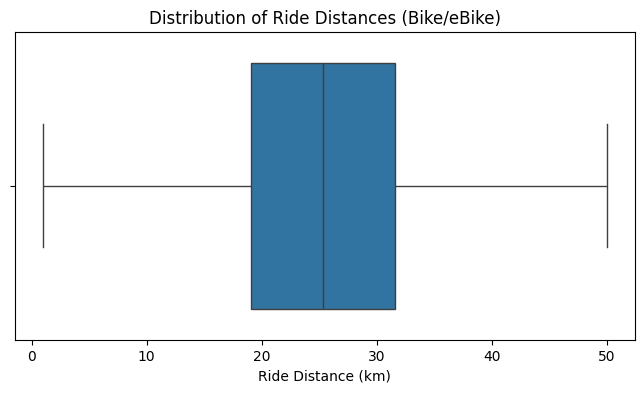

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Ride Distance'])
plt.title("Distribution of Ride Distances (Bike/eBike)")
plt.xlabel("Ride Distance (km)")
plt.show()

*8. Save Cleaned Dataset*

In [16]:
df.to_csv("Data\\Bengaluru_Ola_Bikes_Cleaned.csv", index=False)
print("Cleaned dataset saved as Bengaluru_Ola_Bikes_Cleaned.csv")


Cleaned dataset saved as Bengaluru_Ola_Bikes_Cleaned.csv
